/Users/pedro/.pyenv/versions/doc/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:164: UserWarning: Style JSON file 'iqp.json' not found in any of these locations: /Users/pedro/.pyenv/versions/doc/lib/python3.10/site-packages/qiskit/visualization/circuit/styles/iqp.json, iqp.json. Will use default style.
  self._style, def_font_ratio = load_style(style)


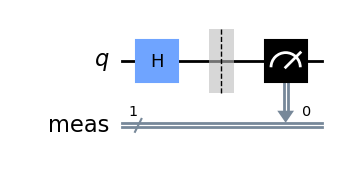

{'1': 496, '0': 528}


In [1]:
#-------------------------------------------------------------------------
# Quantum Depolarizing Noise Simulation
# Chapter 6 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
from qiskit import QuantumCircuit, Aer, execute  
from qiskit.visualization import circuit_drawer
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error 
#-------------------------------------------------------------------------

# Create a quantum circuit  
qc = QuantumCircuit(1)

# Apply Hadamard gate  
qc.h(0)  

# Execute the measurement
qc.measure_all()  

# Draw the circuits
display(circuit_drawer(qc, output='mpl', style="iqp"))

# Define a depolarizing noise model  
noise_model = NoiseModel()  
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.1, 1), ['h'])  

# Simulate the circuit with noise  
simulator = Aer.get_backend('aer_simulator')  
result = execute(qc, simulator, noise_model=noise_model).result()  
print(result.get_counts())  
